MAE =  39.1528859071
MSE =  2699.20329274
RMSE =  51.9538573423
MAPE =  0.458321878789 %


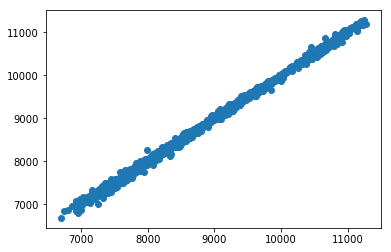

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

df = pd.read_excel('ABT_120X_NoFutureX_2018_7_8.xlsx')

X = df.iloc[:,10:]
y = df['01_High']

#載入線性迴歸，並訓練模型
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

#取得截距。如果公式是y=a+bx，a即是截距
lm.intercept_

#取得迴歸係數，並用Data Frame顯示
X.columns
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])

#使用測試組資料來預測結果
predictions = lm.predict(X)
predictions

#比較實際值及預測值的關係
plt.scatter(y,predictions)

#看實際值及預測值之間的殘差分佈圖
#sns.distplot((y_test-predictions))

#載入迴歸常見的評估指標
from sklearn import metrics

#Mean Absolute Error (MAE)代表平均誤差，公式為所有實際值及預測值相減的絕對值平均。
print("MAE = " , metrics.mean_absolute_error(y,predictions))

#Mean Squared Error (MSE)比起MSE可以拉開誤差差距，算是蠻常用的指標，公式所有實際值及預測值相減的平方的平均
print("MSE = " , metrics.mean_squared_error(y,predictions))

#Root Mean Squared Error (RMSE)代表MSE的平方根。比起MSE更為常用，因為更容易解釋y。
print("RMSE = " , np.sqrt(metrics.mean_squared_error(y,predictions)))

# MAPE function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAPE = " , mean_absolute_percentage_error(y, predictions),"%")

In [3]:
cdf

,Coef
01_Volume,-7.061913e-05
22_X17,-2.478190e-01
02_X34,-1.392454e+00
26_X49,-1.710303e-01
29_1_X4,3.555889e-11
04_X12,-3.132004e-01
20_X35,6.234566e+01
26_X3,-9.061139e-02
16_X3,-5.307220e-03
26_X103,2.048539e-01


In [101]:
X.head(3)

,22_X17,02_X34,26_X49,29_1_X4,04_X12,20_X35,26_X3,16_X3,26_X103,04_X5,...,18_X58,20_X28,20_X71,27_X94,28_X43,30_2_X20,19_X62,03_X78,27_X27,04_X39
3285,375.20,4.85,2152.622498,3.628750e+10,8807.410000,0.05,2172.310059,1620.55,2158.239990,8807.410000,...,0,0,20,0,0,1,1,0,0,0
3286,367.55,1.45,2150.598499,3.652942e+10,8694.696667,0.30,2121.270020,1625.55,2114.750000,8694.696667,...,1,0,20,0,0,1,1,0,0,0
3287,363.34,6.15,2145.352002,3.529369e+10,8610.716667,0.09,2066.260010,1634.40,2056.530029,8610.716667,...,1,0,19,0,0,-1,1,0,0,0


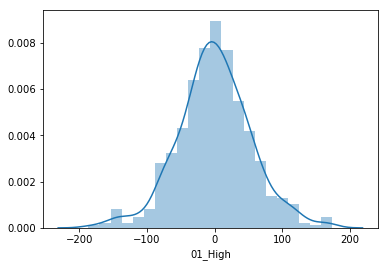

In [2]:
sns.distplot((y_test-predictions))